In [4]:
import pandas as pd

# Path to CSV file
file_path = r"C:\Users\LENOVO\Desktop\Newfolder\project3\household_power_consumption_data.csv"

# Read CSV into DataFrame
df = pd.read_csv(file_path)

# Print first 5 rows of the data
print(df.head())


         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [5]:
import pandas as pd

# Load the data
file_path = r"C:\Users\LENOVO\Desktop\Newfolder\project3\household_power_consumption_data.csv"
df = pd.read_csv(file_path)

# Create a structured dictionary similar to your example
data_summary = {
    'data': {
        'ids': None,
        'features': df.head(),  # or df to include full data (not recommended for large data)
        'targets': None,
        'original': df.head(),  # or df
        'headers': df.columns
    },
    'metadata': {
        'name': 'Individual Household Electric Power Consumption',
        'source': 'UCI ML Repository',
        'description': 'Measurements of electric power consumption in one household with a one-minute sampling rate.',
        'num_instances': df.shape[0],
        'num_features': df.shape[1],
        'has_missing_values': df.isnull().values.any(),
        'columns': [
            {'name': col, 'type': str(df[col].dtype), 'missing_values': df[col].isnull().sum()}
            for col in df.columns
        ]
    }
}

# Display the structured output
import pprint
pprint.pprint(data_summary)


{'data': {'features':          Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  ,
          'headers': Index(['Date', 'Time', 'Global_active_power', 'Global_r

In [6]:


# Show missing values per column
print(df.isnull().sum())


Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


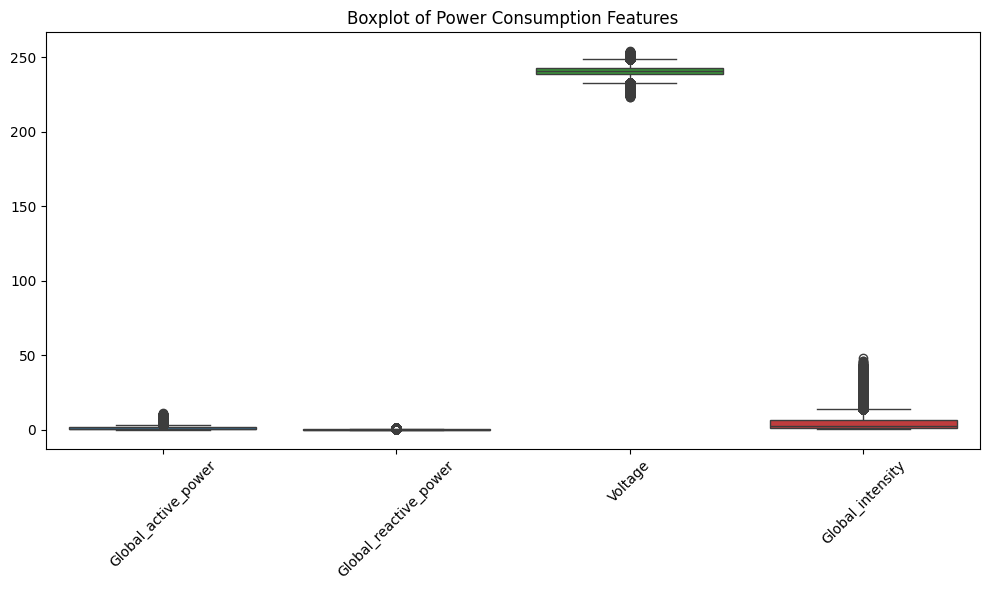

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("household_power_consumption_data.csv")  # Update path if needed


# Create a new column called 'Datetime' by combining Date and Time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop 'Date' and 'Time' columns
df = df.drop(['Date', 'Time'], axis=1)

# Replace '?' with NaN and drop missing rows
df = df.replace('?', np.nan)
df = df.dropna()

# Convert all columns to numeric (float) using apply
df = df.apply(pd.to_numeric)

# Plotting boxplot for selected features
cols_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[cols_to_plot])
plt.title("Boxplot of Power Consumption Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


# Compare shapes
print(f"Original shape: {df.shape}")
print(f"Shape after outlier removal: {df_no_outliers.shape}")


Original shape: (2049280, 8)
Shape after outlier removal: (1739167, 8)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_33780\3873682787.py:11: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(


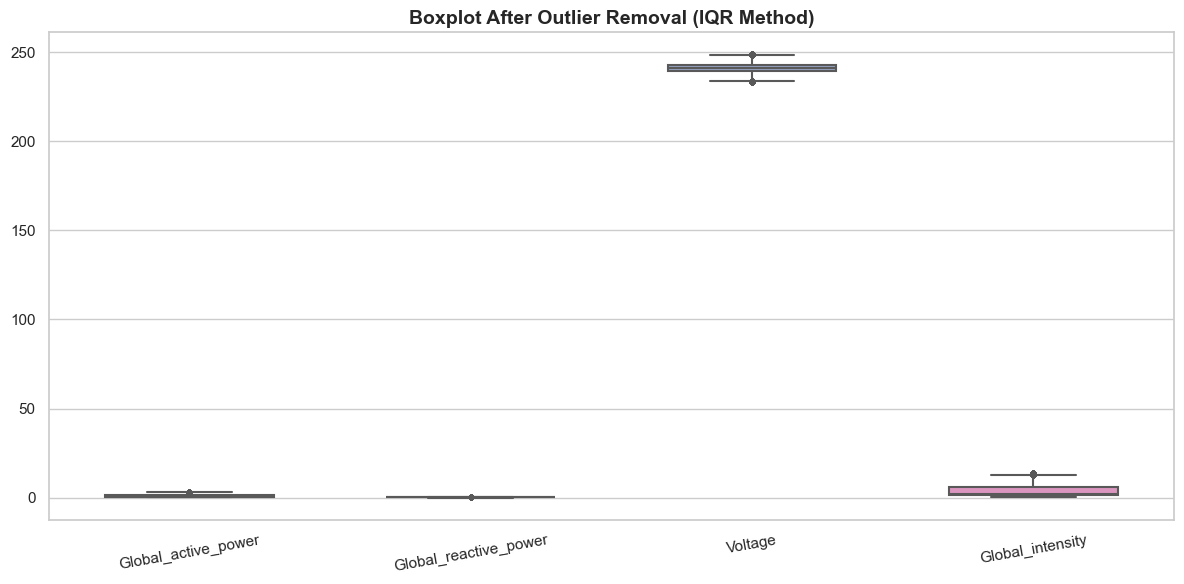

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn theme
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
palette = sns.color_palette("Set2")  # Change color scheme

sns.boxplot(
    data=df_no_outliers[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']],
    palette=palette,
    width=0.6,
    fliersize=3,   # Size of outlier points
    linewidth=1.5,
    ax=ax
)

ax.set_title("Boxplot After Outlier Removal (IQR Method)", fontsize=14, fontweight='bold')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


In [ ]:
df['Sub_metering_1'].isna().sum() #Checks for missing values (NaN) in Sub_metering_1 column in the original df.

np.int64(0)

In [ ]:
# check but on the outlier-cleaned DataFrame.

df_no_outliers['Sub_metering_1'].isna().sum()

#Also 0 → no NaNs after outlier removal.

np.int64(0)

In [ ]:
#Counts how many unique values exist in the column Sub_metering_1 of the original DataFrame


df['Sub_metering_1'].nunique()

88

In [ ]:
#But after removing outliers, only 1 unique value remains → all rows have same value.

df_no_outliers['Sub_metering_1'].nunique()

1

In [ ]:
#Drops Sub_metering_1 because it has no useful info anymore (only one value in entire column)

#Keeping it would add noise, not value to modeling or analysis.

df_no_outliers.drop(columns=['Sub_metering_1'], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_33780\288806536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns=['Sub_metering_1'], inplace=True)


In [ ]:
#cleaned DataFrame (with outliers removed). drop=removing the 'Datetime' column from the DataFrame.
# inplace=True tells pandas to apply the change directly to df_no_outliers (i.e., no need to reassign it like df_no_outliers = df_no_outliers.drop(...)).


df_no_outliers.drop(columns=['Datetime'], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_33780\1366173417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns=['Datetime'], inplace=True)


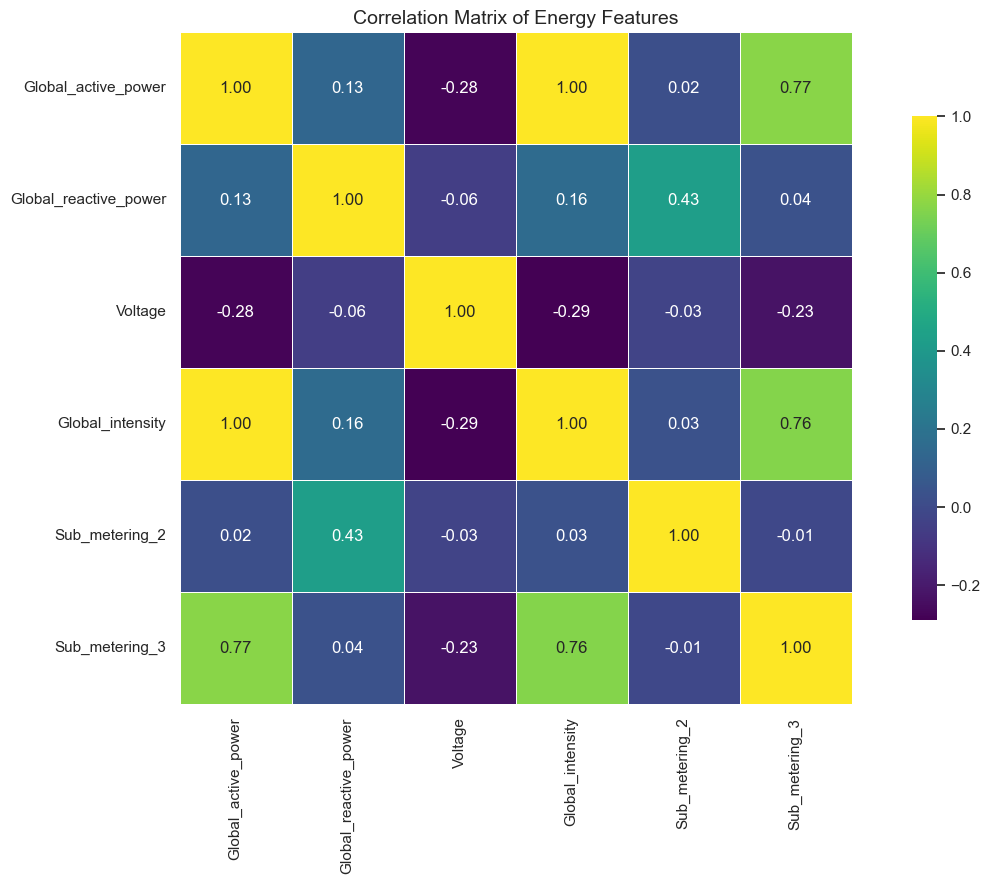

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_no_outliers.corr()

# Plot
plt.figure(figsize=(13, 9))  # Smaller size
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation Matrix of Energy Features", fontsize=14)
plt.tight_layout()
plt.show()


In [22]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from sklearn.model_selection import train_test_split

X = df_no_outliers.drop(columns=['Global_active_power'])
y = df_no_outliers['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
print(y_train)

349934     0.212
1999443    0.466
173429     0.226
954495     1.758
1955929    0.816
           ...  
325111     0.100
1688648    1.510
162621     0.338
814977     0.162
150292     0.316
Name: Global_active_power, Length: 1391333, dtype: float64


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train, scale train
X_test_scaled = scaler.transform(X_test)        # Scale test using same fit


In [27]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


In [28]:
print('M value:',lr_model.coef_) #m value
print('C value:',lr_model.intercept_) #c value

M value: [-7.55923507e-02  5.39260529e-02  3.26393876e+00  5.45419438e-05
  5.43605731e-02]
C value: 0.017393491130027527


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(y_test, y_pred, model_name="Model"):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{model_name} Evaluation:")
    print(f"R² Score: {r2:}")
    print(f"Mean Absolute Error (MAE): {mae:}")
    print(f"Mean Squared Error (MSE): {mse:}")
    print(f"Root Mean Squared Error (RMSE): {rmse:}")

# Call it like this in def
evaluate_model(y_test, y_pred_lr, "Linear Regression")


Linear Regression Evaluation:
R² Score: 0.9978018625277782
Mean Absolute Error (MAE): 0.021877673401937185
Mean Squared Error (MSE): 0.0011061535729461845
Root Mean Squared Error (RMSE): 0.033258887127295536


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(y_test, y_pred, model_name="Model"):
    print(f"\n{model_name} Evaluation:")
    print(f"R²: {r2_score(y_test, y_pred):.6f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.6f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.6f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.6f}")

# Call the evaluation
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")



Random Forest Regression Evaluation:
R²: 0.998148
Mean Absolute Error (MAE): 0.017366
Mean Squared Error (MSE): 0.000932
Root Mean Squared Error (RMSE): 0.030527


In [33]:
print("\nRandom Forest Regression Evaluation:")
print("R²:", round(r2_score(y_test, y_pred_rf) ))
print("MAE:", round(mean_absolute_error(y_test, y_pred_rf) ))
print("MSE:", round(mean_squared_error(y_test, y_pred_rf) ))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_rf))))



Random Forest Regression Evaluation:
R²: 1
MAE: 0
MSE: 0
RMSE: 0


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model
gb_model = GradientBoostingRegressor(n_estimators=50)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("\nGradient Boosting Model Evaluation:")
print("R²:", r2_score(y_test, y_pred_gb))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_gb)))


Gradient Boosting Model Evaluation:
R²: 0.9979115360477121
Mean Absolute Error (MAE): 0.02110122965662553
Mean Squared Error (MSE): 0.0010509633232618119
Root Mean Squared Error (RMSE): 0.03241856448490297


In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize the neural network regressor
nn_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Fit the model to the training data
nn_model.fit(X_train, y_train)

# Predict using the test data
y_pred_nn = nn_model.predict(X_test)

# Define a reusable evaluation function
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"\n{model_name} Evaluation Metrics:")
    print(f"R² Score: {r2_score(y_true, y_pred):.6f}")                      # Goodness of fit
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.6f}")  # Avg absolute diff
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.6f}")    # Avg squared diff
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.6f}")  # Scale-like MAE

# Call the evaluation function
evaluate_model(y_test, y_pred_nn, model_name="Neural Network (MLP)")



Neural Network (MLP) Evaluation Metrics:
R² Score: 0.995098
Mean Absolute Error (MAE): 0.042352
Mean Squared Error (MSE): 0.002467
Root Mean Squared Error (RMSE): 0.049666


In [ ]:
from sklearn.ensemble import RandomForestClassifier   # showing error so last updated 

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100)  # this model is best for 0,1 or yes/no,spam or ham to predict not for continous number

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model Evaluation:")
print("R²:", r2_score(y_test, y_pred_rf))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.